<a href="https://colab.research.google.com/github/WattNotWhat/Spaceship_Titanic/blob/main/SpaceshipOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as LinearRegression 
import sklearn.model_selection as train_test_split
import sklearn.linear_model as LogisiticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer)
import plotly.express as px

import statsmodels.api as sm

# to check for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to check for normality
import scipy.stats as sta

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [133]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [134]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [135]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [136]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(train["Age"].mean(), inplace=True)

In [137]:
train["Spa"].fillna(
    value=train.groupby("Transported")["Spa"].transform("median"), inplace=True
)

test["Spa"].fillna(
    value=train.groupby("Transported")["Spa"].transform("median"), inplace=True
)

In [138]:
train["ShoppingMall"].fillna(
    value=train.groupby("Transported")["ShoppingMall"].transform("median"), inplace=True
)

test["ShoppingMall"].fillna(
    value=test.groupby("Age")["ShoppingMall"].transform("median"), inplace=True
)

In [139]:
test["RoomService"].fillna(
    value=train.groupby("Transported")["RoomService"].transform("median"), inplace=True
)

In [140]:
train["RoomService"].fillna(
    value=train.groupby("Transported")["RoomService"].transform("median"), inplace=True
)

In [141]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall      0
Spa               0
VRDeck          188
Name            200
Transported       0
dtype: int64

In [142]:
train["FoodCourt"].fillna(
    value=train.groupby("Transported")["FoodCourt"].transform("median"), inplace=True
)

test["FoodCourt"].fillna(
    value=test.groupby("Age")["FoodCourt"].transform("median"), inplace=True
)

In [143]:
train["HomePlanet"].fillna("Earth", inplace=True)
test["HomePlanet"].fillna("Earth", inplace=True)

train["CryoSleep"].fillna("False", inplace=True)
test["CryoSleep"].fillna("False", inplace=True)

train["Destination"].fillna("TRAPPIST-1e", inplace=True)
test["Destination"].fillna("TRAPPIST-1e", inplace=True)

In [144]:
train["VIP"].fillna("False", inplace=True)
test["VIP"].fillna("False", inplace=True)

train["VRDeck"].fillna(
    value=train.groupby("Transported")["VRDeck"].transform("median"), inplace=True
)

test["VRDeck"].fillna(
    value=test.groupby("Age")["VRDeck"].transform("median"), inplace=True
)

In [145]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [146]:
train5 = train.copy()
test5 = test.copy()


In [147]:
train["Age_group"] = pd.cut(x=train["Age"], bins=[-1, 18, 40, 65, 100], labels=['child', 'teen', 'adult', 'senior'])
train["Age_group"]

0        teen
1        teen
2       adult
3        teen
4       child
        ...  
8688    adult
8689    child
8690     teen
8691     teen
8692    adult
Name: Age_group, Length: 8693, dtype: category
Categories (4, object): ['child' < 'teen' < 'adult' < 'senior']

In [148]:
test["Age_group"] = pd.cut(x=test["Age"], bins=[-1, 18, 40, 65, 100], labels=['child', 'teen', 'adult', 'senior'])
test["Age_group"]

0        teen
1        teen
2        teen
3        teen
4        teen
        ...  
4272     teen
4273    adult
4274     teen
4275     teen
4276    adult
Name: Age_group, Length: 4277, dtype: category
Categories (4, object): ['child' < 'teen' < 'adult' < 'senior']

In [149]:
train["Age_group"].replace({"teen":1, "child":2, "adult":3, "senior":4}, inplace=True)
train["Age_group"]

0       1
1       1
2       3
3       1
4       2
       ..
8688    3
8689    2
8690    1
8691    1
8692    3
Name: Age_group, Length: 8693, dtype: int64

In [150]:
test["Age_group"].replace({"teen":1, "child":2, "adult":3, "senior":4}, inplace=True)
test["Age_group"]

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    3
4274    1
4275    1
4276    3
Name: Age_group, Length: 4277, dtype: int64

In [151]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2


In [152]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1


In [153]:
train = pd.get_dummies(train, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], drop_first=True)
test = pd.get_dummies(test, columns=['HomePlanet', 'Destination', 'CryoSleep', 'VIP'], drop_first=True)

In [154]:
train.isnull().sum()

PassengerId                    0
Cabin                        199
Age                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
Age_group                      0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
CryoSleep_False                0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
VIP_False                      0
dtype: int64

In [155]:
test.isnull().sum()

PassengerId                    0
Cabin                        100
Age                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                          94
Age_group                      0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_True                 0
CryoSleep_False                0
VIP_True                       0
VIP_False                      0
dtype: int64

In [156]:
train.dropna(axis=1, inplace=True)
test.dropna(axis=1, inplace=True)

In [157]:
train.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Age_group                    0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
CryoSleep_False              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
VIP_False                    0
dtype: int64

In [158]:
train.head()


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,CryoSleep_False,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,VIP_False
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,0,0,0,0,1,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,0,1,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,3,1,0,0,0,0,1,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,1,0,0,0,0,1,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,2,0,0,0,0,0,1,0,0


In [159]:
columns_in_model = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age_group", "HomePlanet_Europa",
                    "HomePlanet_Mars", "CryoSleep_True", "CryoSleep_False", "Destination_PSO J318.5-22", "Destination_TRAPPIST-1e",
                    "VIP_True", "VIP_False"]

In [169]:
test_x = test[columns_in_model]
train_y = train["Transported"]

In [170]:
X=train[columns_in_model]
y=train["Transported"].astype(int)

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=1)

In [172]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [173]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_val, y_val))

Accuracy on training set :  0.9380443714050944
Accuracy on test set :  0.7442484662576687


In [174]:
y.sum(axis=0)

4378

In [175]:
from sklearn import metrics

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='',cmap="cividis")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [176]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_val)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_val,pred_test))

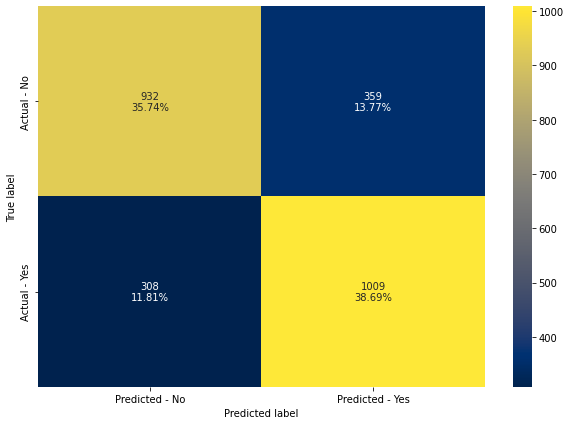

In [177]:
make_confusion_matrix(dTree, y_val)

In [178]:
get_recall_score(dTree)

Recall on training set :  0.9650441032342372
Recall on test set :  0.7661351556567958


In [179]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age_group', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'CryoSleep_False', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True', 'VIP_False']


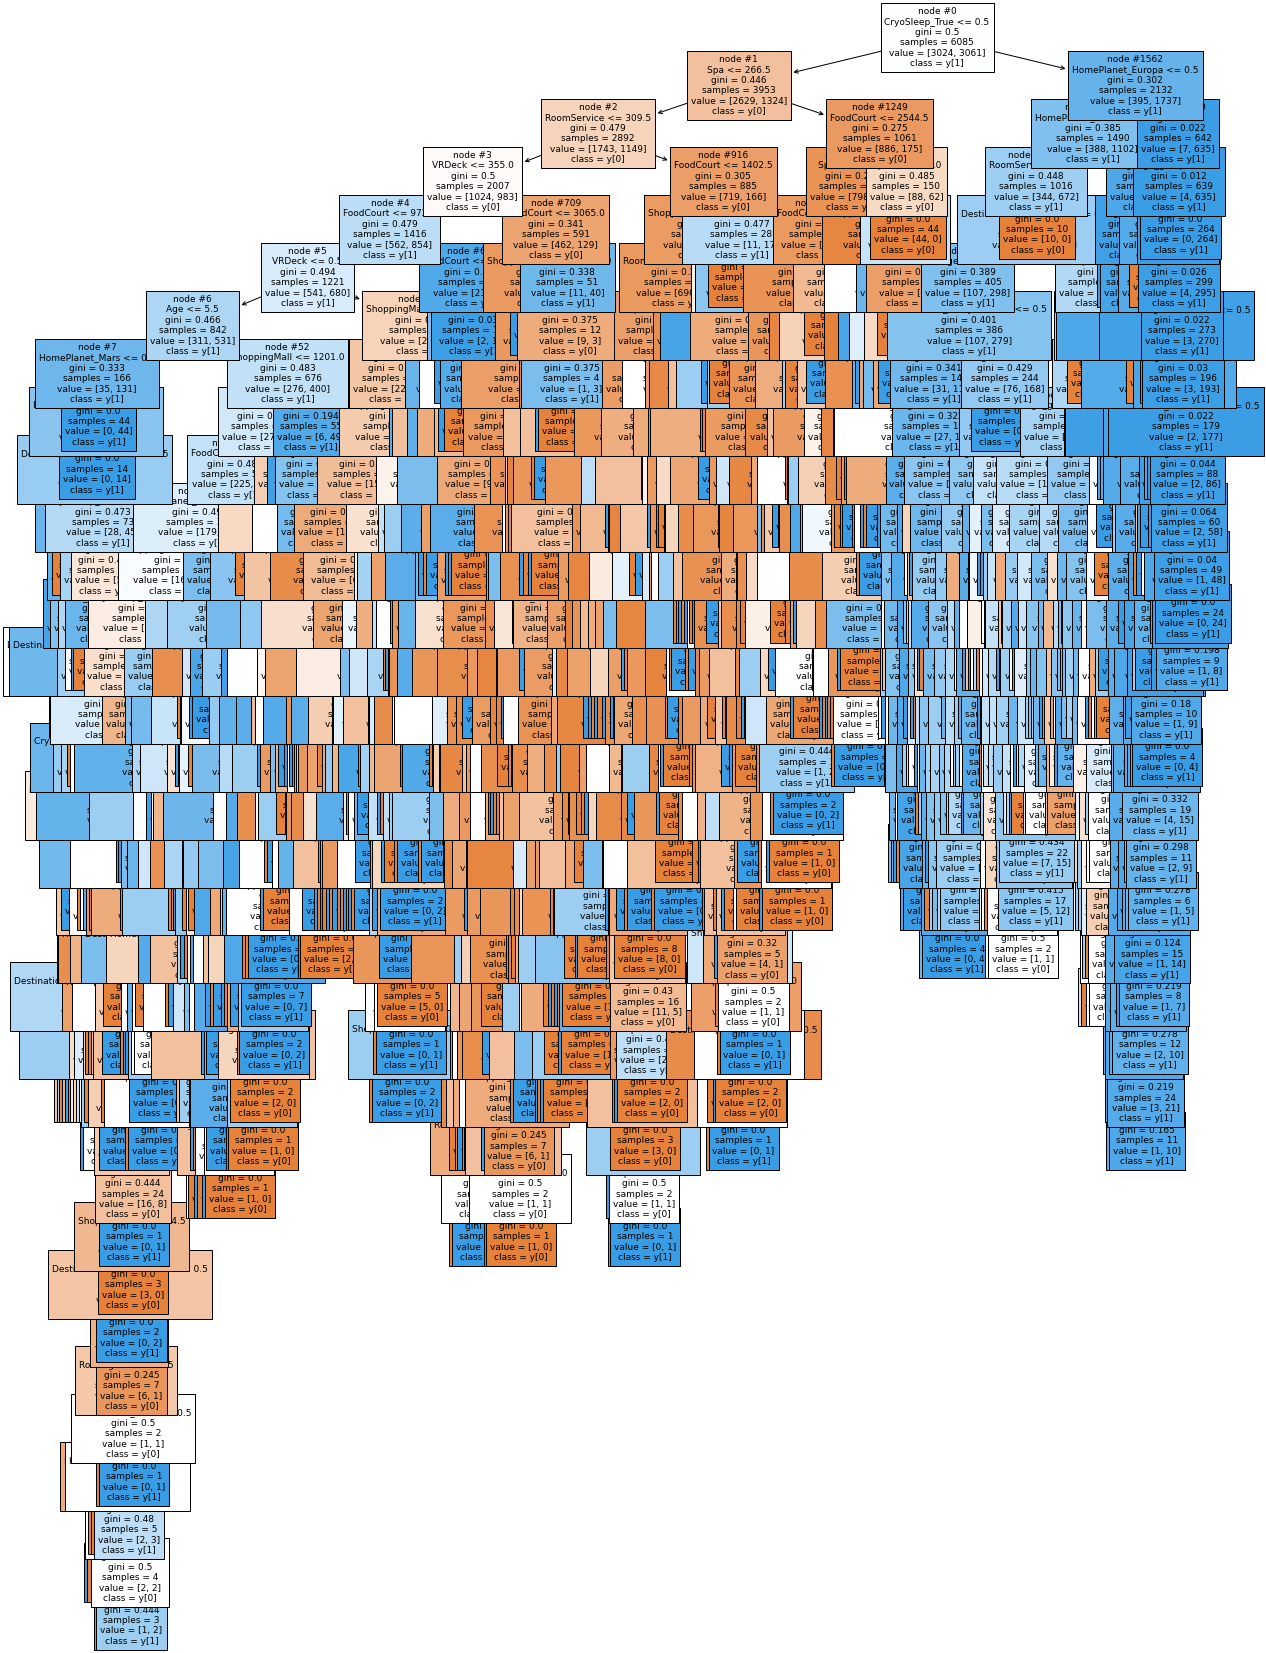

In [180]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [182]:
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- CryoSleep_True <= 0.50
|   |--- Spa <= 266.50
|   |   |--- RoomService <= 309.50
|   |   |   |--- VRDeck <= 355.00
|   |   |   |   |--- FoodCourt <= 972.00
|   |   |   |   |   |--- VRDeck <= 0.50
|   |   |   |   |   |   |--- Age <= 5.50
|   |   |   |   |   |   |   |--- HomePlanet_Mars <= 0.50
|   |   |   |   |   |   |   |   |--- HomePlanet_Europa <= 0.50
|   |   |   |   |   |   |   |   |   |--- Destination_TRAPPIST-1e <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- RoomService <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- RoomService >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Destination_TRAPPIST-1e >  0.50
|   |   |   |   |   |   |   |   |   |   |--- CryoSleep_False <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- CryoSleep_Fals

In [183]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
CryoSleep_True             0.250197
VRDeck                     0.142853
Age                        0.122017
Spa                        0.107046
FoodCourt                  0.101661
RoomService                0.099656
ShoppingMall               0.079918
HomePlanet_Europa          0.028960
HomePlanet_Mars            0.023556
Destination_TRAPPIST-1e    0.011273
Age_group                  0.011124
VIP_False                  0.008049
Destination_PSO J318.5-22  0.006724
VIP_True                   0.003695
CryoSleep_False            0.003273


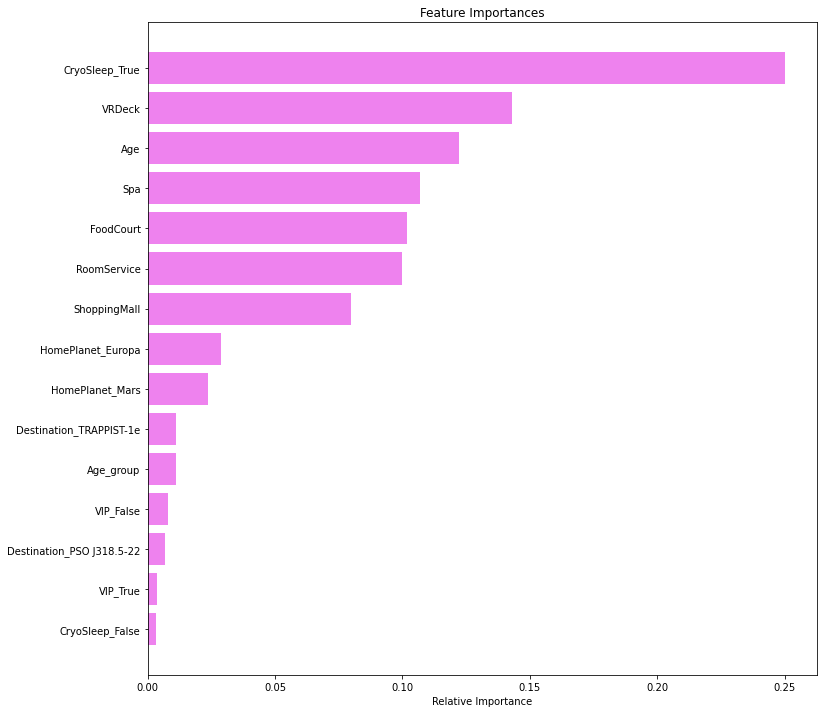

In [184]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [185]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

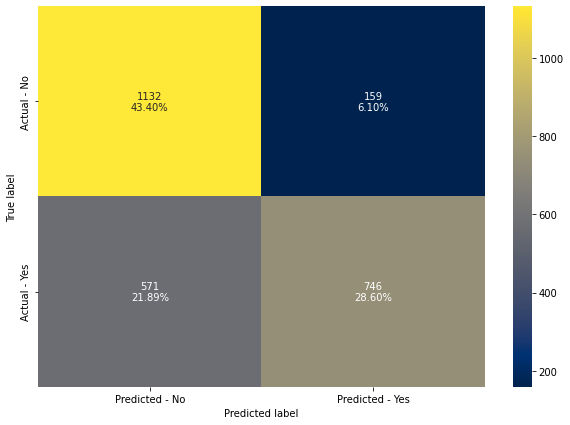

In [186]:
make_confusion_matrix(dTree1, y_val)

In [187]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_val, y_val))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7179950698438784
Accuracy on test set :  0.7200920245398773
Recall on training set :  0.5674616138516825
Recall on test set :  0.5664388762338648


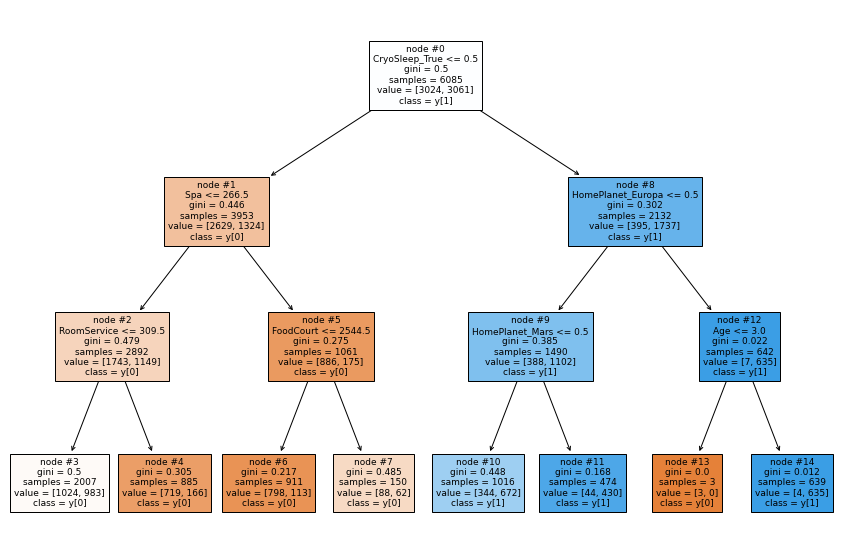

In [188]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [189]:

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- CryoSleep_True <= 0.50
|   |--- Spa <= 266.50
|   |   |--- RoomService <= 309.50
|   |   |   |--- weights: [1024.00, 983.00] class: 0
|   |   |--- RoomService >  309.50
|   |   |   |--- weights: [719.00, 166.00] class: 0
|   |--- Spa >  266.50
|   |   |--- FoodCourt <= 2544.50
|   |   |   |--- weights: [798.00, 113.00] class: 0
|   |   |--- FoodCourt >  2544.50
|   |   |   |--- weights: [88.00, 62.00] class: 0
|--- CryoSleep_True >  0.50
|   |--- HomePlanet_Europa <= 0.50
|   |   |--- HomePlanet_Mars <= 0.50
|   |   |   |--- weights: [344.00, 672.00] class: 1
|   |   |--- HomePlanet_Mars >  0.50
|   |   |   |--- weights: [44.00, 430.00] class: 1
|   |--- HomePlanet_Europa >  0.50
|   |   |--- Age <= 3.00
|   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |--- Age >  3.00
|   |   |   |--- weights: [4.00, 635.00] class: 1



In [190]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
CryoSleep_True             0.666989
RoomService                0.117350
Spa                        0.087677
HomePlanet_Europa          0.058429
HomePlanet_Mars            0.040837
FoodCourt                  0.022549
Age                        0.006169
ShoppingMall               0.000000
VRDeck                     0.000000
Age_group                  0.000000
CryoSleep_False            0.000000
Destination_PSO J318.5-22  0.000000
Destination_TRAPPIST-1e    0.000000
VIP_True                   0.000000
VIP_False                  0.000000


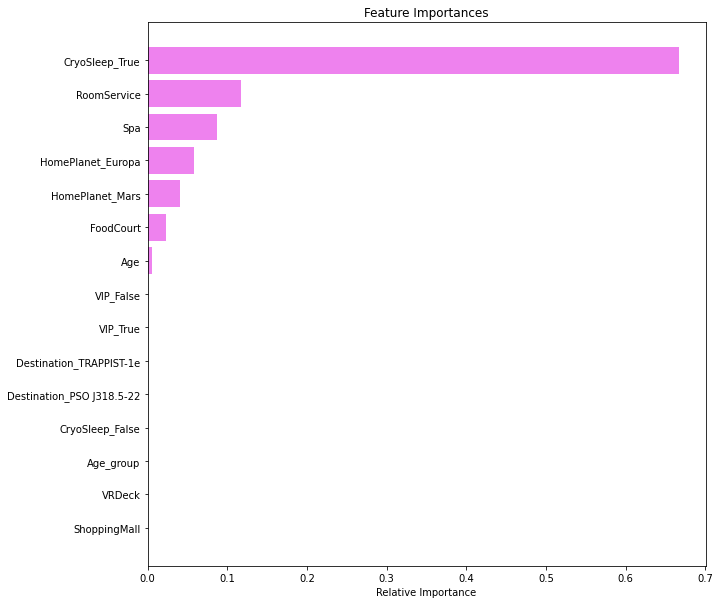

In [191]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [192]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

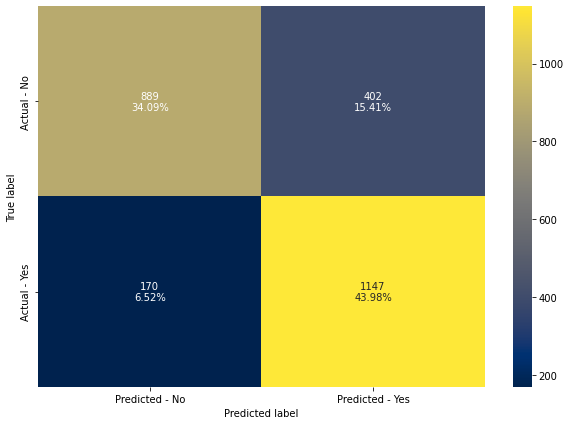

In [193]:
make_confusion_matrix(estimator,y_val)

In [194]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_val, y_val))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7702547247329499
Accuracy on test set :  0.7806748466257669
Recall on training set :  0.8595230316889906
Recall on test set :  0.8709187547456341


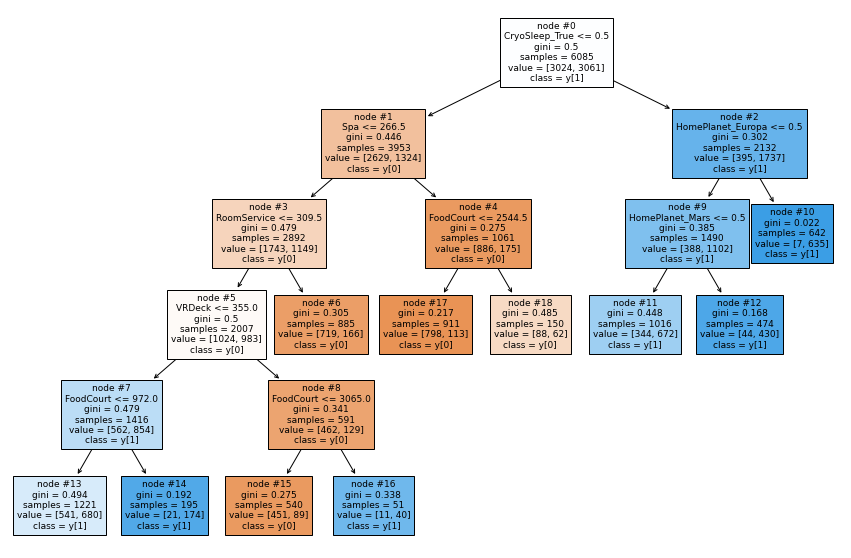

In [195]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [196]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- CryoSleep_True <= 0.50
|   |--- Spa <= 266.50
|   |   |--- RoomService <= 309.50
|   |   |   |--- VRDeck <= 355.00
|   |   |   |   |--- FoodCourt <= 972.00
|   |   |   |   |   |--- weights: [541.00, 680.00] class: 1
|   |   |   |   |--- FoodCourt >  972.00
|   |   |   |   |   |--- weights: [21.00, 174.00] class: 1
|   |   |   |--- VRDeck >  355.00
|   |   |   |   |--- FoodCourt <= 3065.00
|   |   |   |   |   |--- weights: [451.00, 89.00] class: 0
|   |   |   |   |--- FoodCourt >  3065.00
|   |   |   |   |   |--- weights: [11.00, 40.00] class: 1
|   |   |--- RoomService >  309.50
|   |   |   |--- weights: [719.00, 166.00] class: 0
|   |--- Spa >  266.50
|   |   |--- FoodCourt <= 2544.50
|   |   |   |--- weights: [798.00, 113.00] class: 0
|   |   |--- FoodCourt >  2544.50
|   |   |   |--- weights: [88.00, 62.00] class: 0
|--- CryoSleep_True >  0.50
|   |--- HomePlanet_Europa <= 0.50
|   |   |--- HomePlanet_Mars <= 0.50
|   |   |   |--- weights: [344.00, 672.00] class: 1
|   |   |---

In [197]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                Imp
CryoSleep_True             0.555827
VRDeck                     0.107653
RoomService                0.097792
FoodCourt                  0.082941
Spa                        0.073064
HomePlanet_Europa          0.048691
HomePlanet_Mars            0.034031
Age                        0.000000
ShoppingMall               0.000000
Age_group                  0.000000
CryoSleep_False            0.000000
Destination_PSO J318.5-22  0.000000
Destination_TRAPPIST-1e    0.000000
VIP_True                   0.000000
VIP_False                  0.000000


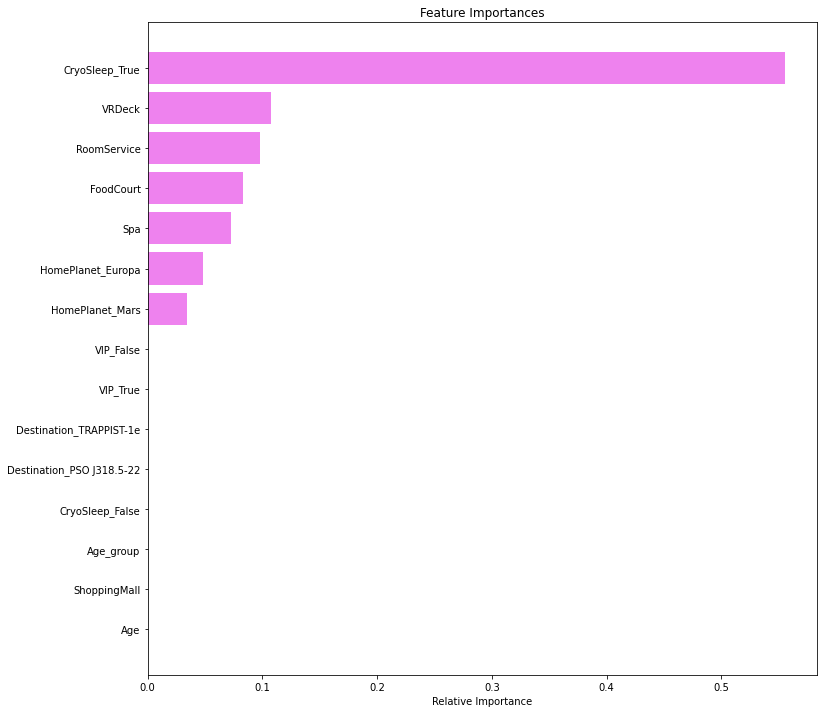

In [198]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [199]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [200]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.081142
1,0.000000,0.081142
2,0.000000,0.081142
3,0.000000,0.081142
4,0.000000,0.081142
...,...,...
490,0.006217,0.327085
491,0.006416,0.333501
492,0.009180,0.342681
493,0.017503,0.395189


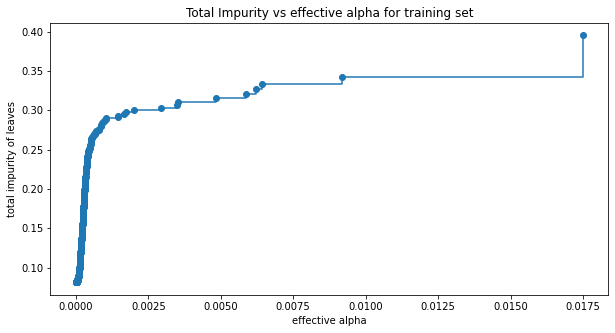

In [201]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [202]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10479237612858755


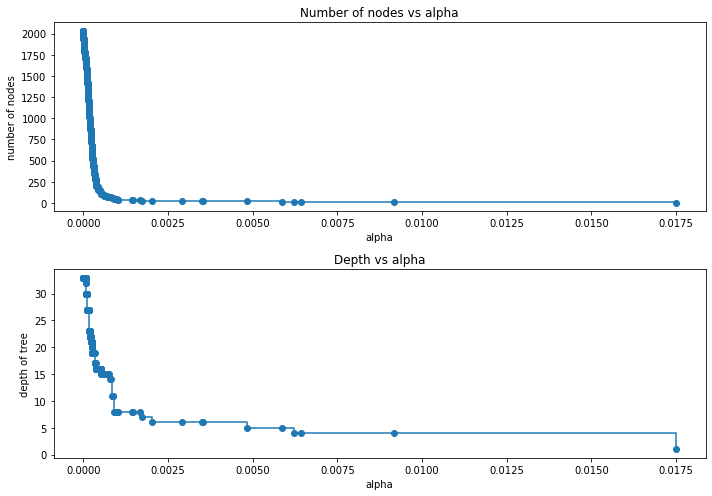

In [203]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [204]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_val, y_val) for clf in clfs]
print(test_scores)

[0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7442484662576687, 0.7465490797546013, 0.7465490797546013, 0.7465490797546013, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7469325153374233, 0.7484662576687117, 0.7484662576687117, 0.7484662576687117, 0.7484662576687117, 0.7484662576687117, 0.7484662576687117, 0.7484662576687117, 0.7480828220858896, 0.7480828220858896,

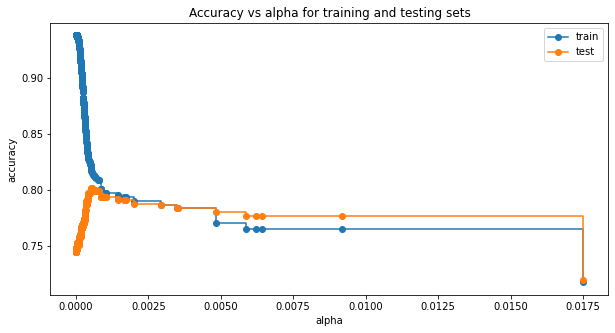

In [205]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [206]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_val, y_val))

DecisionTreeClassifier(ccp_alpha=0.000553489460638187, random_state=1)
Training accuracy of best model:  0.8151191454396056
Test accuracy of best model:  0.8021472392638037


In [208]:
test_predictions=best_model.predict(test_x)

In [211]:
submission_final = pd.DataFrame({'PassengerId':test['PassengerId'], 'Transported':test_predictions.astype(bool)})

In [212]:
submission_final.to_csv("results_2.csv", index=False)

Sources I used for analysis:
https://medium.com/mlearning-ai/how-i-solved-kaggles-spaceship-titanic-problem-using-bins-90b3a209db4e